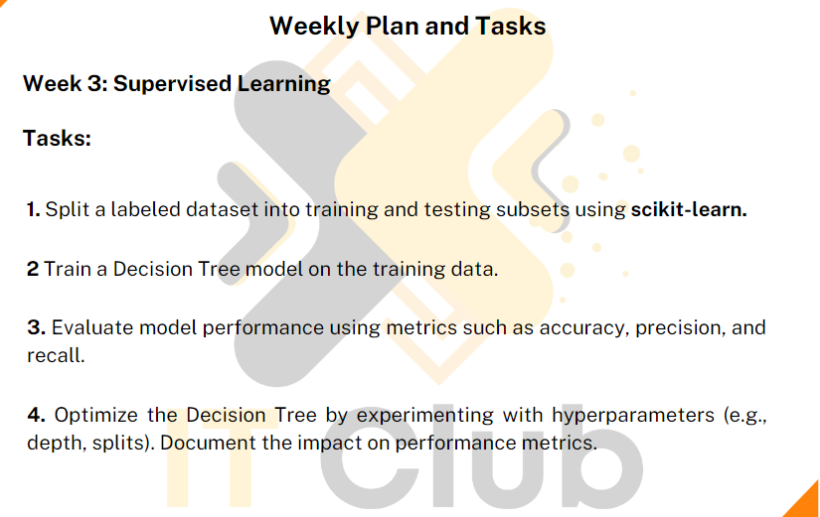

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Add target column


In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

print("Default Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Default Model Performance:
Accuracy: 0.94
Precision: 0.95
Recall: 0.94


In [ ]:
optimized_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=4, criterion="entropy", random_state=42)
optimized_clf.fit(X_train, y_train)
y_pred_optimized = optimized_clf.predict(X_test)

accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted', zero_division=1)
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted', zero_division=1)

print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy_opt:.2f}")
print(f"Precision: {precision_opt:.2f}")
print(f"Recall: {recall_opt:.2f}")


Optimized Model Performance:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97


# **Documentation**

# Decision Tree Classification: Step-by-Step Documentation

## Step 1: Understanding the Dataset
I used the **Wine Dataset**, which contains information about different wines categorized into three types (0, 1, and 2). Each wine has 13 different attributes, such as alcohol content, acidity, and color intensity.

### What I did initially:
- Loaded the dataset from **scikit-learn’s datasets**.
- Converted it into a structured format (DataFrame) for easy handling (it was originally in tuples).
- Identified that there were no missing values, so no cleaning was needed.

## Step 2: Preparing the Data:
Before training the model, we needed to **split the dataset** into two parts:
- **Training Data (80%)** - Used to train the model.
- **Testing Data (20%)** - Used to check how well the model performs on new data.

## Step 3: Training a Basic Decision Tree Model:
We used a **Decision Tree Classifier**, which is a model that makes decisions by splitting data into smaller parts based on feature values. Think of it like a flowchart where each decision depends on a question like, "Is alcohol content above 12%?"

### Steps:
- Created a **Decision Tree** with default settings.
- Trained it using the **training dataset**.
- Tested it using the **testing dataset**.
- Measured its performance using:
  - **Accuracy**: How often the model is correct.
  - **Precision**: How precise the model is in identifying correct wine types.
  - **Recall**: How well the model detects all wine types.

### Results of the Basic Model:
- **Accuracy:** 94.44%
- **Precision:** 95.14%
- **Recall:** 94.44%

## Step 4: Optimizing the Decision Tree
To improve the model, we adjusted some key settings:
- **Max Depth (5 levels)** → Prevents the tree from growing too large.
- **Min Samples Split (4 samples required to split a node)** → Helps generalization.
- **Criterion (Entropy instead of Gini)** → Measures how well splits separate data.

### Results of the Optimized Model:
- **Accuracy:** 97.22%
- **Precision:** 97.41%
- **Recall:** 97.22%